In [153]:
## we will see hoe spending on advertisement impacts sales.we will build a model to predict sales.
# setting up directory
import os
os.getcwd()

'D:\\ML certification files'

In [154]:
os.chdir("D:\\ML certification files")

In [155]:
# loading packages
import pandas as pd
import numpy as np

In [156]:
# loading csv file
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [157]:
# creating a backup of data
backup=df

In [158]:
#drop column "unnamed"
df.drop("Unnamed: 0",axis=1,inplace=True)

In [159]:
# checking head
df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [160]:
# checking data types
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [161]:
# checking correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [162]:
# checking description
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [163]:
# checking distribution of data for all variables i.e columns
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

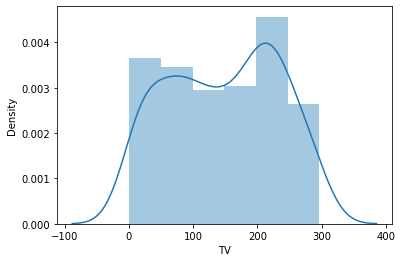

In [164]:
sns.distplot(df["TV"])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

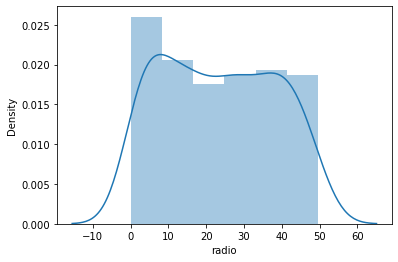

In [165]:
sns.distplot(df["radio"])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

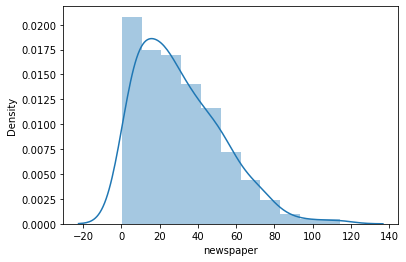

In [166]:
sns.distplot(df["newspaper"])

In [167]:
# all are normally distributed except newspaper bcoz in forms a skewed curve instead of bell curve
# let us normalise newspaper
df["newspaper"]=np.log1p(df["newspaper"])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

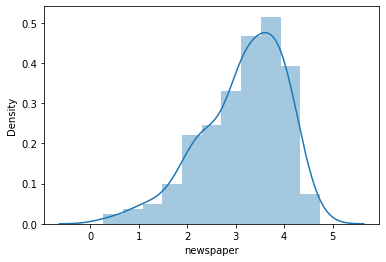

In [168]:
# let us check again after newspaper is normalised
sns.distplot(df["newspaper"])

In [169]:
# we forget to check for null values, lets do it now
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [170]:
##let us now build the model

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [172]:
mn=MinMaxScaler()

In [173]:
df_mn=mn.fit_transform(df[["TV","radio","newspaper"]])

In [174]:
df_mn_df=pd.DataFrame(df_mn,columns=["TV","radio","newspaper"],index=df.index)

In [176]:
x=df_mn_df[["TV","radio","newspaper"]]
y=df[["sales"]]

In [177]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [180]:
from sklearn.linear_model import LinearRegression

In [182]:
lr=LinearRegression()

In [183]:
lr.fit(x_train,y_train)

LinearRegression()

In [184]:
pred=lr.predict(x_test)

In [187]:
pred

array([[21.76658423],
       [16.49537558],
       [ 7.61032155],
       [17.92001592],
       [18.71544364],
       [23.88873873],
       [16.37326061],
       [13.50004331],
       [ 9.22110654],
       [17.39965556],
       [14.51123819],
       [ 9.86707637],
       [17.15176512],
       [16.74817179],
       [15.14198247],
       [15.60143601],
       [12.49316189],
       [17.24364491],
       [11.04579803],
       [18.0279748 ],
       [ 9.22099159],
       [12.87661254],
       [ 8.8232658 ],
       [10.44326604],
       [11.44643467],
       [15.06291102],
       [ 9.82107846],
       [19.48388949],
       [18.10327885],
       [17.22388453],
       [21.60787564],
       [14.74133395],
       [16.2108992 ],
       [12.41137387],
       [20.00387556],
       [15.39848461],
       [13.96422303],
       [10.11211388],
       [20.99573063],
       [ 7.4633586 ]])

In [191]:
# let us check with evaluation matrix

In [192]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [194]:
mse=mean_squared_error(y_test,pred)
mse

2.0114644264578847

In [195]:
mae=mean_absolute_error(y_test,pred)

In [196]:
mae

1.0497324724870432

In [197]:
r=r2_score(y_test,pred)

In [198]:
r

0.8917065013140673

In [201]:
pred1=lr.predict(x_train)

In [202]:
r1=r2_score(y_train,pred1)

In [203]:
r1

0.896182014418114

In [ ]:
# model is performing same for train and test

In [204]:
# let us check coefficients
lr.coef_

array([[13.85714006,  8.83406614,  0.5214694 ]])

In [205]:
lr.intercept_

array([2.69200645])